# Are the half-lives of small and large intestine macrophage subpopulations different and what are they?

### Import plotting and analysis modules

In [1]:
import pandas as pd
import seaborn as sns
from numpy import log
from statsmodels.formula.api import ols

### Read in the YFP data for small intestine and print it to see what it looks like

In [2]:
yfp_si = pd.read_csv('Data/yfp_SI.csv')
yfp_si

,intestine,cell_type,week,mouse,yfp
0,small,CD4- Tim4-,0.7,0,0.4610
1,small,CD4- Tim4-,0.7,1,0.6660
2,small,CD4- Tim4-,0.7,2,0.8260
3,small,CD4- Tim4-,0.7,3,0.3670
4,small,CD4- Tim4-,7.0,4,0.1590
5,small,CD4- Tim4-,7.0,5,0.1360
6,small,CD4- Tim4-,7.0,6,0.1210
7,small,CD4- Tim4-,7.0,7,0.1420
8,small,CD4- Tim4-,7.0,8,0.1810
9,small,CD4- Tim4-,12.0,9,0.1210


## Plot the data of all cell types

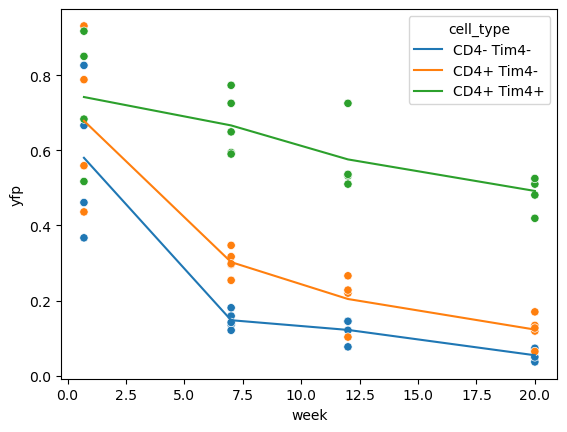

In [3]:
sns.lineplot(data=yfp_si, x='week', y='yfp', hue='cell_type', err_style=None);
sns.scatterplot(data=yfp_si, x='week', y='yfp', hue='cell_type', legend=False);

## Do small intestine macrophages decay exponentially? 

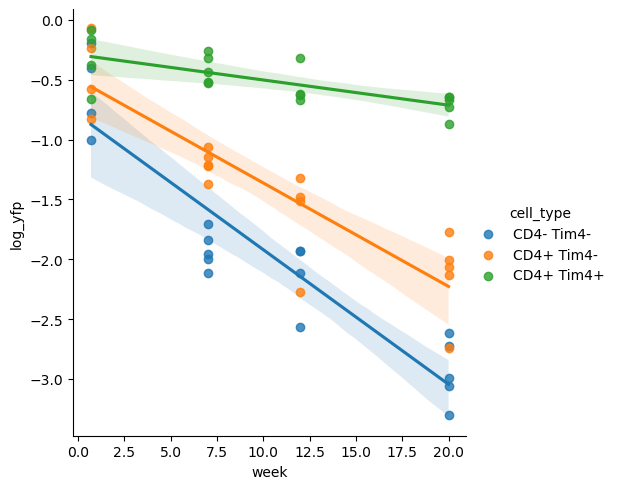

In [4]:
yfp_si['log_yfp'] = log(yfp_si['yfp'])
sns.lmplot(data=yfp_si, x='week', y='log_yfp', hue='cell_type');

## Fit a linear model

In [5]:
formula = 'log_yfp ~ cell_type*week'
fit_si = ols(formula, yfp_si).fit()
print(fit_si.summary().tables[1])

                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.2922      0.121     -2.419      0.019      -0.535      -0.049
cell_type[T.CD4+ Tim4-]         -0.2063      0.171     -1.207      0.233      -0.550       0.137
cell_type[T.CD4- Tim4-]         -0.5036      0.171     -2.948      0.005      -0.847      -0.160
week                            -0.0210      0.010     -2.179      0.034      -0.040      -0.002
cell_type[T.CD4+ Tim4-]:week    -0.0654      0.014     -4.794      0.000      -0.093      -0.038
cell_type[T.CD4- Tim4-]:week    -0.0914      0.014     -6.700      0.000      -0.119      -0.064


## Check the fit of the model by looking at the residuals

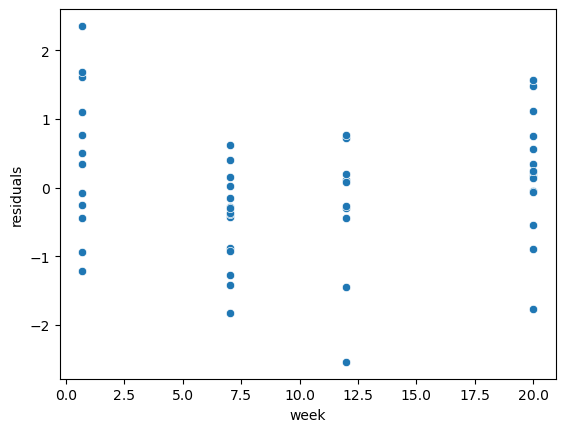

In [6]:
yfp_si['residuals'] = fit_si.resid_pearson
sns.scatterplot(data=yfp_si, x='week', y='residuals');

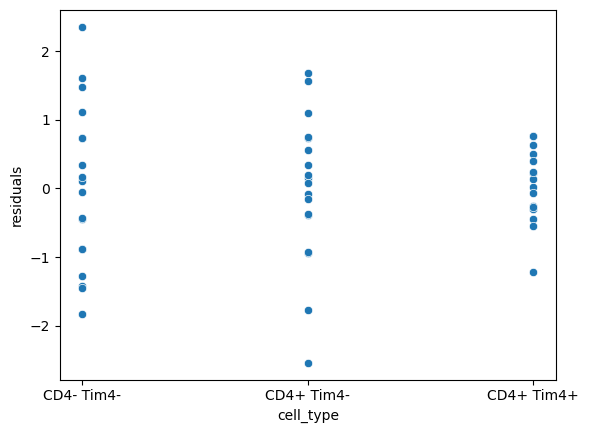

In [7]:
yfp_si['residuals'] = fit_si.resid_pearson
sns.scatterplot(data=yfp_si, x='cell_type', y='residuals');

Residuals against week look okay. They are spread between -2 and +2 as we would expect and there is no major trend or deviation across weeks.

Residuals against cell type are okay for CD4- Tim4- and CD4+ Tim4- cells. However, the residuals for CD4+ Tim4+ have a narrower distribution between -1 and +1. This is probably because the proportion of these cells is close to zero causing the observations to bunch up. However, this is unlikely to overly affect the linear model fit and the parameter estimates. 

## Calculate the estimated decay rate and half-life for each macrophage subpopulation

In [8]:
formula = 'log_yfp ~ C(cell_type, Treatment("CD4- Tim4-"))*week'
fit_si_mm = ols(formula, yfp_si).fit()
print(fit_si_mm.summary().tables[1])

formula = 'log_yfp ~ C(cell_type, Treatment("CD4+ Tim4-"))*week'
fit_si_pm = ols(formula, yfp_si).fit()
print(fit_si_pm.summary().tables[1])

formula = 'log_yfp ~ C(cell_type, Treatment("CD4+ Tim4+"))*week'
fit_si_pp = ols(formula, yfp_si).fit()
print(fit_si_pp.summary().tables[1])

                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                   -0.7958      0.121     -6.587      0.000      -1.039      -0.553
C(cell_type, Treatment("CD4- Tim4-"))[T.CD4+ Tim4+]          0.5036      0.171      2.948      0.005       0.160       0.847
C(cell_type, Treatment("CD4- Tim4-"))[T.CD4+ Tim4-]          0.2973      0.171      1.740      0.088      -0.046       0.641
week                                                        -0.1124      0.010    -11.654      0.000      -0.132      -0.093
C(cell_type, Treatment("CD4- Tim4-"))[T.CD4+ Tim4+]:week     0.0914      0.014      6.700      0.000       0.064       0.119
C(cell_type, Treatment("CD4- Tim4-"))[T.CD4+ Tim4-]:week     0.0260      0.014      1.906      0.063      -0.001       0.053


In [9]:
r_mm = -fit_si_mm.params['week']
r_pm = -fit_si_pm.params['week']
r_pp = -fit_si_pp.params['week']

s_r_mm = fit_si_mm.bse['week']
s_r_pm = fit_si_pm.bse['week']
s_r_pp = fit_si_pp.bse['week']

print(f'estimated decay rate of CD4- Tim4- = {r_mm:.3f} ± {s_r_mm:.3f} wk')
print(f'estimated decay rate of CD4+ Tim4- = {r_pm:.3f} ± {s_r_pm:.3f} wk')
print(f'estimated decay rate of CD4+ Tim4+ = {r_pp:.3f} ± {s_r_pp:.3f} wk')

estimated decay rate of CD4- Tim4- = 0.112 ± 0.010 wk
estimated decay rate of CD4+ Tim4- = 0.086 ± 0.010 wk
estimated decay rate of CD4+ Tim4+ = 0.021 ± 0.010 wk


In [10]:
thalf_mm = log(2)  / r_mm
thalf_pm = log(2)  / r_pm
thalf_pp = log(2)  / r_pp

print(f'estimated half life of CD4- Tim4- = {thalf_mm:.2f} wk')
print(f'estimated half life of CD4+ Tim4- = {thalf_pm:.2f} wk')
print(f'estimated half life of CD4+ Tim4+ = {thalf_pp:.2f} wk')

estimated half life of CD4- Tim4- = 6.17 wk
estimated half life of CD4+ Tim4- = 8.02 wk
estimated half life of CD4+ Tim4+ = 32.97 wk


## Summarise your findings in words

- CD4- Tim4- small intestine macrophages decay at a rate of 0.11 ± 0.01 wk $^{-1}$ (95% CI = (0.09, 0.13), *p* < 0.001), which corresponds to an estimated mean half-life of about 6.2 weeks. 
- There is no significant difference in decay rates between CD4- Tim4- and CD4+ Tim4- macrophages (*p* = 0.063). 
- However, there is a significant difference in decay rates between CD4- Tim4- and CD4+ Tim4+ macrophages (decay rate is 0.02 ± 0.01, 95% CI = (0.002, 0.04), *p* < 0.001). CD4+ Tim4+ macrophages have an estimated mean half-life of about 33 weeks.

# Decay rates and half-lives of macrophages in the large intestine

In [11]:
yfp_li = pd.read_csv('Data/yfp_LI.csv')
yfp_li

,intestine,cell_type,week,mouse,yfp
0,large,CD4- Tim4-,0.7,0,0.1550
1,large,CD4- Tim4-,0.7,1,0.2990
2,large,CD4- Tim4-,0.7,2,0.5600
3,large,CD4- Tim4-,0.7,3,0.2500
4,large,CD4- Tim4-,7.0,4,0.1690
5,large,CD4- Tim4-,7.0,5,0.1390
6,large,CD4- Tim4-,7.0,6,0.1910
7,large,CD4- Tim4-,7.0,7,0.1520
8,large,CD4- Tim4-,12.0,8,0.1600
9,large,CD4- Tim4-,12.0,9,0.1310


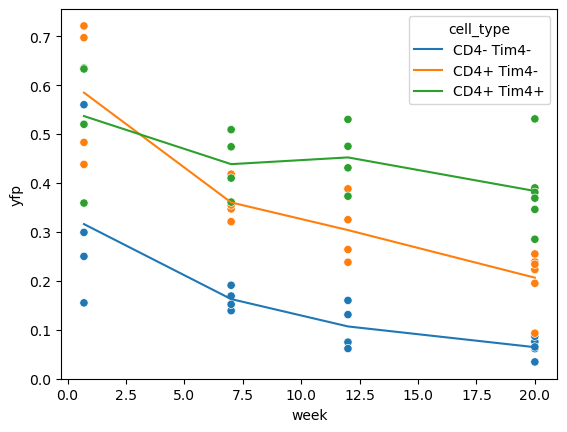

In [12]:
sns.lineplot(data=yfp_li, x='week', y='yfp', hue='cell_type', err_style=None);
sns.scatterplot(data=yfp_li, x='week', y='yfp', hue='cell_type', legend=False);

In [13]:
yfp_li['log_yfp'] = log(yfp_li['yfp'])

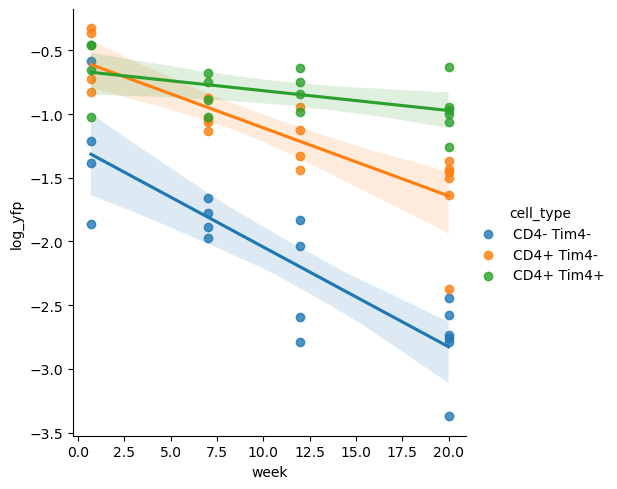

In [14]:
sns.lmplot(data=yfp_li, x='week', y='log_yfp', hue='cell_type');

In [15]:
formula = 'log_yfp ~ C(cell_type, Treatment("CD4- Tim4-"))*week'
fit_li = ols(formula, yfp_li).fit()
print(fit_li.summary().tables[1])

                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                   -1.2604      0.120    -10.547      0.000      -1.501      -1.020
C(cell_type, Treatment("CD4- Tim4-"))[T.CD4+ Tim4+]          0.5998      0.169      3.549      0.001       0.260       0.940
C(cell_type, Treatment("CD4- Tim4-"))[T.CD4+ Tim4-]          0.6868      0.169      4.064      0.000       0.347       1.027
week                                                        -0.0783      0.009     -8.702      0.000      -0.096      -0.060
C(cell_type, Treatment("CD4- Tim4-"))[T.CD4+ Tim4+]:week     0.0628      0.013      4.931      0.000       0.037       0.088
C(cell_type, Treatment("CD4- Tim4-"))[T.CD4+ Tim4-]:week     0.0249      0.013      1.956      0.056      -0.001       0.050


In [16]:
formula = 'log_yfp ~ C(cell_type, Treatment("CD4+ Tim4+"))*week'
fit_li_pp = ols(formula, yfp_li).fit()
print(fit_li_pp.summary().tables[1])

                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                   -0.6606      0.120     -5.528      0.000      -0.901      -0.420
C(cell_type, Treatment("CD4+ Tim4+"))[T.CD4+ Tim4-]          0.0870      0.169      0.515      0.609      -0.253       0.427
C(cell_type, Treatment("CD4+ Tim4+"))[T.CD4- Tim4-]         -0.5998      0.169     -3.549      0.001      -0.940      -0.260
week                                                        -0.0156      0.009     -1.728      0.090      -0.034       0.003
C(cell_type, Treatment("CD4+ Tim4+"))[T.CD4+ Tim4-]:week    -0.0379      0.013     -2.975      0.005      -0.063      -0.012
C(cell_type, Treatment("CD4+ Tim4+"))[T.CD4- Tim4-]:week    -0.0628      0.013     -4.931      0.000      -0.088      -0.037


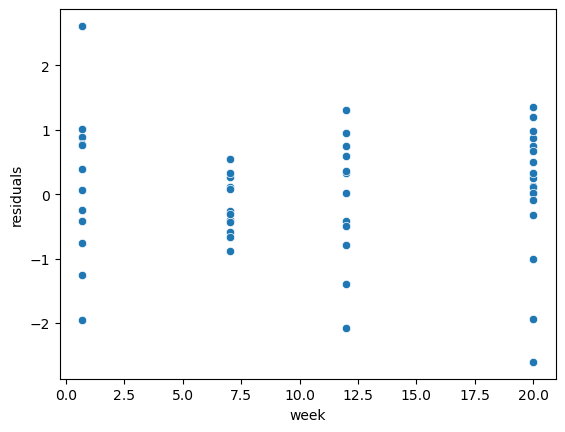

In [17]:
yfp_li['residuals'] = fit_li.resid_pearson
sns.scatterplot(data=yfp_li, x='week', y='residuals');

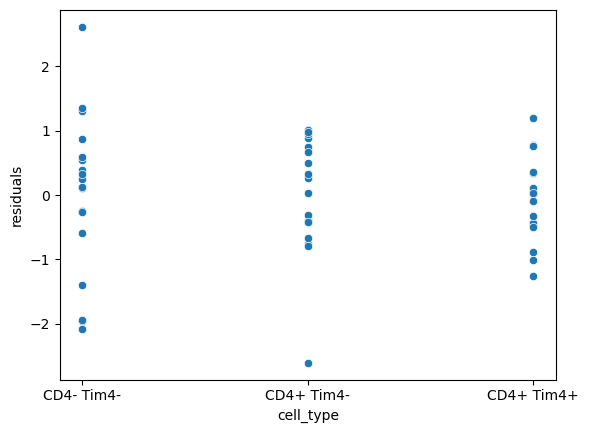

In [18]:
yfp_li['residuals'] = fit_li.resid_pearson
sns.scatterplot(data=yfp_li, x='cell_type', y='residuals');

In [19]:
mu = fit_li.params

r_mm = -mu['week']
delta_r_pm = -mu['C(cell_type, Treatment("CD4- Tim4-"))[T.CD4+ Tim4-]:week']
delta_r_pp = -mu['C(cell_type, Treatment("CD4- Tim4-"))[T.CD4+ Tim4+]:week']
r_pm = r_mm + delta_r_pm
r_pp = r_mm + delta_r_pp

r_pp, r_pm, r_mm

(0.015552254994760428, 0.0534147499518627, 0.0783102129220033)

In [20]:
thalf_mm = log(2)  / r_mm
thalf_pp = log(2)  / r_pp
thalf_pm = log(2)  / r_pm

print(f'estimated half life of CD4- Tim4- = {thalf_mm:.2f} wk')
print(f'estimated half life of CD4+ Tim4- = {thalf_pm:.2f} wk')
print(f'estimated half life of CD4+ Tim4+ = {thalf_pp:.2f} wk')

estimated half life of CD4- Tim4- = 8.85 wk
estimated half life of CD4+ Tim4- = 12.98 wk
estimated half life of CD4+ Tim4+ = 44.57 wk


- CD4- Tim4- large intestine macrophages decay at a rate of 0.078 ± 0.009 wk $^{-1}$ (95% CI = (0.060, 0.096), *p* < 0.001), which corresponds to an estimated mean half-life of about 8.9 weeks. 
- There is no significant difference in decay rates between CD4- Tim4- and CD4+ Tim4- macrophages (*p* = 0.056). 
- There is a significant difference in decay rates between CD4- Tim4- and CD4+ Tim4+ macrophages (*p* < 0.001). However, the data were insufficient to distinguish the CD4+ Tim4+ decay rate from zero (*p* = 0.09).

# Does macrophage turnover occur at the same rate in the small and large intestine?

In [21]:
yfp = pd.read_csv('Data/yfp_both.csv')
yfp

,intestine,week,mouse,yfp
0,small,0.7,0,0.5990
1,small,0.7,1,0.7840
2,small,0.7,2,0.9020
3,small,0.7,3,0.4450
4,small,7.0,4,0.3850
5,small,7.0,5,0.3510
6,small,7.0,6,0.3100
7,small,7.0,7,0.3560
8,small,7.0,8,0.4320
9,small,12.0,9,0.3770


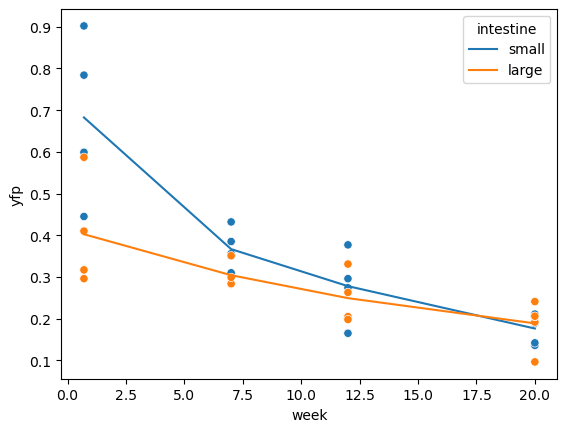

In [22]:
sns.lineplot(data=yfp, x='week', y='yfp', hue='intestine', err_style=None);
sns.scatterplot(data=yfp, x='week', y='yfp', hue='intestine', legend=False);

In [23]:
yfp['log_yfp'] = log(yfp['yfp'])

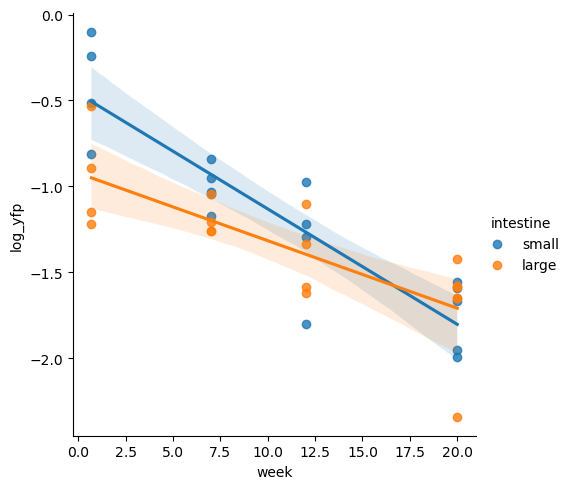

In [24]:
sns.lmplot(data=yfp, x='week', y='log_yfp', hue='intestine');

In [25]:
formula = 'log_yfp ~ intestine*week'
fit_large = ols(formula, yfp).fit()
print(fit_large.summary().tables[1])

                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.9235      0.106     -8.729      0.000      -1.139      -0.708
intestine[T.small]          0.4637      0.148      3.130      0.004       0.162       0.765
week                       -0.0393      0.008     -4.936      0.000      -0.056      -0.023
intestine[T.small]:week    -0.0279      0.011     -2.426      0.021      -0.051      -0.004


In [26]:
formula = 'log_yfp ~ C(intestine, Treatment("small"))*week'
fit_small = ols(formula, yfp).fit()
print(fit_small.summary().tables[1])

                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -0.4598      0.104     -4.432      0.000      -0.671      -0.248
C(intestine, Treatment("small"))[T.large]         -0.4637      0.148     -3.130      0.004      -0.765      -0.162
week                                              -0.0672      0.008     -8.113      0.000      -0.084      -0.050
C(intestine, Treatment("small"))[T.large]:week     0.0279      0.011      2.426      0.021       0.004       0.051


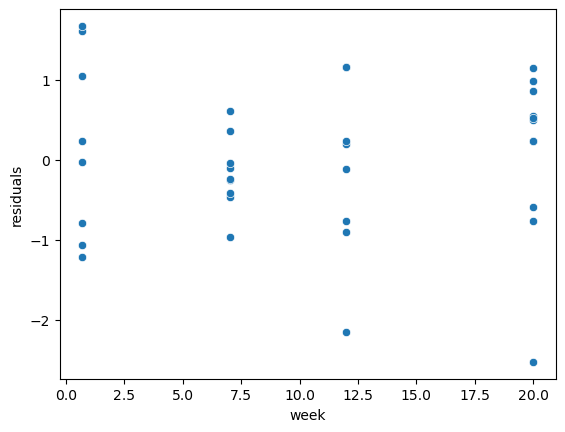

In [27]:
yfp['residuals'] = fit_large.resid_pearson
sns.scatterplot(data=yfp, x='week', y='residuals');

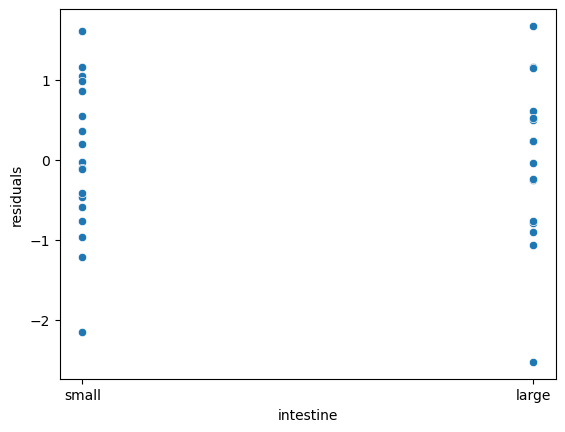

In [28]:
yfp['residuals'] = fit_large.resid_pearson
sns.scatterplot(data=yfp, x='intestine', y='residuals');

In [29]:
r_large = -fit_large.params['week']
r_small = -fit_small.params['week']

s_r_large = fit_large.bse['week']
s_r_small = fit_small.bse['week']

print(f'estimated decay rate of macrophages in large intestine = {r_large:.3f} ± {s_r_large:.3f} wk')
print(f'estimated decay rate of macrophages in small intestine = {r_small:.3f} ± {s_r_small:.3f} wk')

estimated decay rate of macrophages in large intestine = 0.039 ± 0.008 wk
estimated decay rate of macrophages in small intestine = 0.067 ± 0.008 wk


In [30]:
thalf_large = log(2)  / r_large
thalf_small = log(2)  / r_small

print(f'estimated half life of macropages in large intestine = {thalf_large:.2f} wk')
print(f'estimated half life of macropages in small intestine = {thalf_small:.2f} wk')

estimated half life of macropages in large intestine = 17.63 wk
estimated half life of macropages in small intestine = 10.31 wk


## Summarise your findings in words

- Macrophages in the large intestine decay at a rate of 0.039 ± 0.008 wk $^{-1}$ (95% CI = (0.023, 0.056), *p* < 0.001), which corresponds to an estimated mean half-life of about 17.6 weeks. 
- Macrophages in the small intestine decay at a rate of 0.067 ± 0.008 wk $^{-1}$ (95% CI = (0.050, 0.084), *p* < 0.001), which corresponds to an estimated mean half-life of about 10.3 weeks. 
- There is a significant difference in macrophage decay rates between the small and large intestines (*p* < 0.021).